In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import tensorflow as tf

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Run all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.utils import resample

In [4]:
df = pd.read_csv("american_bankruptcy.csv")
df.describe()
df.head()
df.info()
print("Duplicates:", df.duplicated().sum())
print("NULLS:", df.isnull().sum().sum())
print("NAs:", df.isna().sum().sum())

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [3]:
print(df['status_label'].value_counts())

status_label
alive     73462
failed     5220
Name: count, dtype: int64


In [4]:
# df = df[df['X1'] <= df['X10']]
# f.info()

# Simple Neural Network

## Define function

In [30]:
def train_nn(X_train, y_train, X_val, y_val, X_test, y_test, class_weight_dict = {0: 1.0, 1: 1.0}, verbose=1, plot=1, model_type=2):

    # Encode target labels as 0 and 1
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)  # 0 for "alive", 1 for "failed"
    y_test_encoded = le.transform(y_test)
    y_val_encoded = le.transform(y_val)
    
    # Define the neural network model
    if model_type == 1:
        model = Sequential([
            
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(1, activation='sigmoid')  # Binary classification output
        ])
    elif model_type == 2:
        model = Sequential([
            Dense(128, activation='relu', input_dim=(X_train.shape[1])),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(1, activation='sigmoid')  # Binary classification output
        ])
    elif model_type == 3:
        model = Sequential([
            Dense(256, activation='relu', input_dim=(X_train.shape[1])),
            BatchNormalization(),
            Dropout(0.3),
        
            Dense(128, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(1, activation='sigmoid')  # Binary classification output
        ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_val, y_val_encoded), verbose=verbose, class_weight=class_weight_dict, callbacks=[early_stopping])
    
    # Predict labels for train set
    y_train_pred = model.predict(X_train)
    
    # Predict labels for test set
    y_test_pred = model.predict(X_test)
    
    # Convert probabilities to binary labels (0 or 1)
    y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
    y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

    # Compute Precision, F1-score and Recall
    train_precision = precision_score(y_train_encoded, y_train_pred_classes)
    train_f1 = f1_score(y_train_encoded, y_train_pred_classes)
    train_recall = recall_score(y_train_encoded, y_train_pred_classes)
    test_precision = precision_score(y_test_encoded, y_test_pred_classes)
    test_f1 = f1_score(y_test_encoded, y_test_pred_classes)
    test_recall = recall_score(y_test_encoded, y_test_pred_classes)

    # Evaluate the model
    print("\nTrain set evaluation:")
    train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_accuracy)
    print("Train Precision:", train_precision)
    print("Train F1 Score:", train_f1)
    print("Train Recall:", train_recall)
    
    print("\nTest set evaluation:")
    test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)
    print("Test Precision:", test_precision)
    print("Test F1 Score:", test_f1)
    print("Test Recall:", test_recall)

    if (plot):
        # Plot the Confusion Matrix for Train and Test
        f, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred_classes),
                   annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
        sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred_classes),
                   annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    else:
        print("Train set: ")
        print(confusion_matrix(y_train_encoded, y_train_pred_classes))
        print("Test set: ")
        print(confusion_matrix(y_test_encoded, y_test_pred_classes))

    return model

## Convert X data into ratios relative to total assets

In [6]:
cols = df.columns.difference(["company_name", "status_label", "year"])

df[cols] = df[cols].div(df['X10'],axis=0)

df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,0.689971,1.124304,0.024795,0.120150,0.453467,0.047454,0.173210,...,1.382369,1.0,0.243519,0.095355,0.258065,0.221075,0.271291,1.382369,0.541814,1.262219
1,C_1,alive,2000,0.692247,1.017036,0.026468,0.091710,0.456776,0.026403,0.164118,...,1.245637,1.0,0.256445,0.065241,0.228600,0.178658,0.290751,1.245637,0.515267,1.153927
2,C_1,alive,2001,0.614836,0.741309,0.031676,0.038309,0.403532,-0.082989,0.109164,...,0.899355,1.0,0.306532,0.006633,0.158046,0.211862,0.196569,0.899355,0.563172,0.861046
3,C_1,alive,2002,0.577337,0.723466,0.039574,0.044777,0.378599,-0.018074,0.096592,...,0.883074,1.0,0.239809,0.005204,0.159608,0.296488,0.180749,0.883074,0.570377,0.838297
4,C_1,alive,2003,0.609346,0.737781,0.037615,0.066955,0.348580,0.004940,0.147557,...,0.919167,1.0,0.350583,0.029341,0.181387,0.185059,0.185938,0.919167,0.574669,0.852212


## Split into training, validation and test sets based on time

In [7]:
df_train = df[df["year"] <= 2011]
y_train = df_train["status_label"]
X_train = df_train.drop(columns = ["company_name", "status_label", "year", "X10"]) # drop X10 since it is all 1
X_train.info()
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55927 entries, 0 to 78653
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      55927 non-null  float64
 1   X2      55927 non-null  float64
 2   X3      55927 non-null  float64
 3   X4      55927 non-null  float64
 4   X5      55927 non-null  float64
 5   X6      55927 non-null  float64
 6   X7      55927 non-null  float64
 7   X8      55927 non-null  float64
 8   X9      55927 non-null  float64
 9   X11     55927 non-null  float64
 10  X12     55927 non-null  float64
 11  X13     55927 non-null  float64
 12  X14     55927 non-null  float64
 13  X15     55927 non-null  float64
 14  X16     55927 non-null  float64
 15  X17     55927 non-null  float64
 16  X18     55927 non-null  float64
dtypes: float64(17)
memory usage: 7.7 MB
<class 'pandas.core.series.Series'>
Index: 55927 entries, 0 to 78653
Series name: status_label
Non-Null Count  Dtype 
--------------  ----- 
55927 non-n

In [8]:
df_val = df[(df["year"] <= 2014) & (df["year"] >= 2012)]
y_val = df_val["status_label"]
X_val = df_val.drop(columns = ["company_name", "status_label", "year", "X10"])
X_val.info()
y_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10473 entries, 13 to 78677
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      10473 non-null  float64
 1   X2      10473 non-null  float64
 2   X3      10473 non-null  float64
 3   X4      10473 non-null  float64
 4   X5      10473 non-null  float64
 5   X6      10473 non-null  float64
 6   X7      10473 non-null  float64
 7   X8      10473 non-null  float64
 8   X9      10473 non-null  float64
 9   X11     10473 non-null  float64
 10  X12     10473 non-null  float64
 11  X13     10473 non-null  float64
 12  X14     10473 non-null  float64
 13  X15     10473 non-null  float64
 14  X16     10473 non-null  float64
 15  X17     10473 non-null  float64
 16  X18     10473 non-null  float64
dtypes: float64(17)
memory usage: 1.4 MB
<class 'pandas.core.series.Series'>
Index: 10473 entries, 13 to 78677
Series name: status_label
Non-Null Count  Dtype 
--------------  ----- 
10473 non

In [9]:
df_test = df[(df["year"] >= 2015)]
y_test = df_test["status_label"]
X_test = df_test.drop(columns = ["company_name", "status_label", "year", "X10"])
X_test.info()
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12282 entries, 16 to 78681
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      12282 non-null  float64
 1   X2      12282 non-null  float64
 2   X3      12282 non-null  float64
 3   X4      12282 non-null  float64
 4   X5      12282 non-null  float64
 5   X6      12282 non-null  float64
 6   X7      12282 non-null  float64
 7   X8      12282 non-null  float64
 8   X9      12282 non-null  float64
 9   X11     12282 non-null  float64
 10  X12     12282 non-null  float64
 11  X13     12282 non-null  float64
 12  X14     12282 non-null  float64
 13  X15     12282 non-null  float64
 14  X16     12282 non-null  float64
 15  X17     12282 non-null  float64
 16  X18     12282 non-null  float64
dtypes: float64(17)
memory usage: 1.7 MB
<class 'pandas.core.series.Series'>
Index: 12282 entries, 16 to 78681
Series name: status_label
Non-Null Count  Dtype 
--------------  ----- 
12282 non

In [10]:
df.groupby("year")["status_label"].value_counts(normalize=True).unstack()

status_label,alive,failed
year,,
1999,0.928410,0.071590
2000,0.922694,0.077306
2001,0.915458,0.084542
2002,0.910987,0.089013
2003,0.906045,0.093955
2004,0.907084,0.092916
2005,0.909869,0.090131
2006,0.911337,0.088663
2007,0.916189,0.083811


In [11]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency table
contingency_table = pd.crosstab(df["year"], df["status_label"])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, P-value: {p}")


Chi-Square Statistic: 731.2001247028753, P-value: 8.730479710760694e-143


Year is significant in determining status_label. However, since we cant to use model to predict future trends, we shall drop year for neural networks.

## No balancing

### Keras without scaling

Epoch 1/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8213 - loss: 0.4589 - val_accuracy: 0.9524 - val_loss: 0.2030
Epoch 2/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9187 - loss: 0.2783 - val_accuracy: 0.9524 - val_loss: 0.2568
Epoch 3/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9188 - loss: 0.2740 - val_accuracy: 0.9521 - val_loss: 0.2315
Epoch 4/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9193 - loss: 0.2690 - val_accuracy: 0.9515 - val_loss: 0.2296
Epoch 5/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9209 - loss: 0.2647 - val_accuracy: 0.9517 - val_loss: 0.2136
Epoch 6/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9196 - loss: 0.2673 - val_accuracy: 0.9526 - val_loss: 0.1974
Epoch 7/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9179 - loss: 0.2689 - val_accuracy: 0.9519 - val_loss: 0.2309
Epoch 8/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9193 - loss: 0

<Sequential name=sequential, built=True>

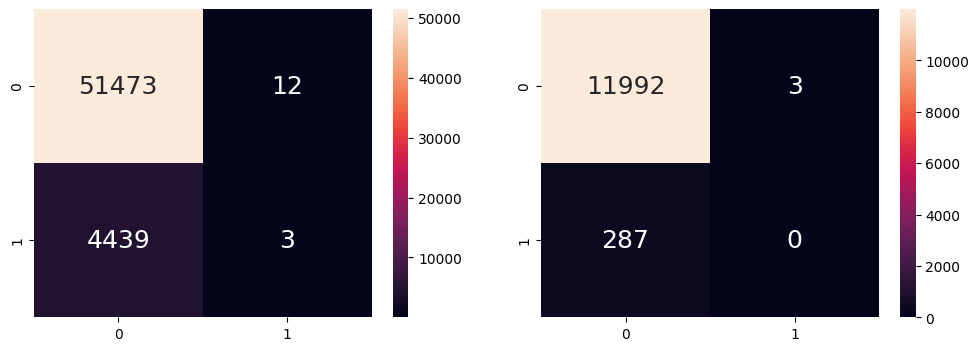

In [12]:
train_nn(X_train, y_train, X_val, y_val, X_test, y_test)

## Balancing dataset

In [13]:
print("Train set:")
print(df_train['status_label'].value_counts())

print("\nValidation set:")
print(df_val['status_label'].value_counts())

print("\nTest set: ")
print(df_test['status_label'].value_counts())


Train set:
status_label
alive     51485
failed     4442
Name: count, dtype: int64

Validation set:
status_label
alive     9982
failed     491
Name: count, dtype: int64

Test set: 
status_label
alive     11995
failed      287
Name: count, dtype: int64


### Undersample Majority class in train set

#### Trying every integer ratio

In [14]:
def undersample(df_train, df_val, df_test, n):
    df_majority = df_train[df_train.status_label == "alive"]
    df_minority = df_train[df_train.status_label == "failed"]
    
    # Downsample majority class
    df_majority_downsampled = resample(
        df_majority, 
        replace=False, 
        n_samples=n*len(df_minority), 
        random_state=99
    )
    
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    df_balanced.head()
    df_balanced.info()

    # Split into X and y variables
    X_train_undersampled = df_balanced.drop(columns=["status_label", "company_name", "year", "X10"])  # Features
    y_train_undersampled = df_balanced["status_label"]  # Target column

    X_val = df_val.drop(columns=["status_label", "company_name", "year", "X10"])
    y_val = df_val["status_label"]

    X_test = df_test.drop(columns=["status_label", "company_name", "year", "X10"])
    y_test = df_test["status_label"]
    
    print("Ratio is " + str(n) + " : " + str(1))
    train_nn(X_train_undersampled, y_train_undersampled, X_val, y_val, X_test, y_test,verbose=0,plot=0)

In [15]:
for i in range(1, 12):
    undersample(df_train, df_val, df_test, i)

<class 'pandas.core.frame.DataFrame'>
Index: 8884 entries, 68464 to 78623
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  8884 non-null   object 
 1   status_label  8884 non-null   object 
 2   year          8884 non-null   int64  
 3   X1            8884 non-null   float64
 4   X2            8884 non-null   float64
 5   X3            8884 non-null   float64
 6   X4            8884 non-null   float64
 7   X5            8884 non-null   float64
 8   X6            8884 non-null   float64
 9   X7            8884 non-null   float64
 10  X8            8884 non-null   float64
 11  X9            8884 non-null   float64
 12  X10           8884 non-null   float64
 13  X11           8884 non-null   float64
 14  X12           8884 non-null   float64
 15  X13           8884 non-null   float64
 16  X14           8884 non-null   float64
 17  X15           8884 non-null   float64
 18  X16           8884 non-null 

### Synthetic Minority Over-sampling Technique (SMOTE)

In [16]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define SMOTE with a 50% ratio
smote = SMOTE(sampling_strategy=0.5, random_state=99) 

# Apply SMOTE only to training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_oversampled))


Before SMOTE: Counter({'alive': 51485, 'failed': 4442})
After SMOTE: Counter({'alive': 51485, 'failed': 25742})


#### Keras without scaling

Epoch 1/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6294 - loss: 0.6721 - val_accuracy: 0.9201 - val_loss: 0.4794
Epoch 2/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6774 - loss: 0.5943 - val_accuracy: 0.8568 - val_loss: 0.4513
Epoch 3/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6862 - loss: 0.5836 - val_accuracy: 0.8776 - val_loss: 0.4554
Epoch 4/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6945 - loss: 0.5771 - val_accuracy: 0.8254 - val_loss: 0.4929
Epoch 5/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6956 - loss: 0.5731 - val_accuracy: 0.8864 - val_loss: 0.4765
Epoch 6/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6999 - loss: 0.5691 - val_accuracy: 0.8919 - val_loss: 0.4094
Epoch 7/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7061 - loss: 0.5598 - val_accuracy: 0.8985 - val_loss: 0.4482
Epoch 8/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7066 - loss: 0

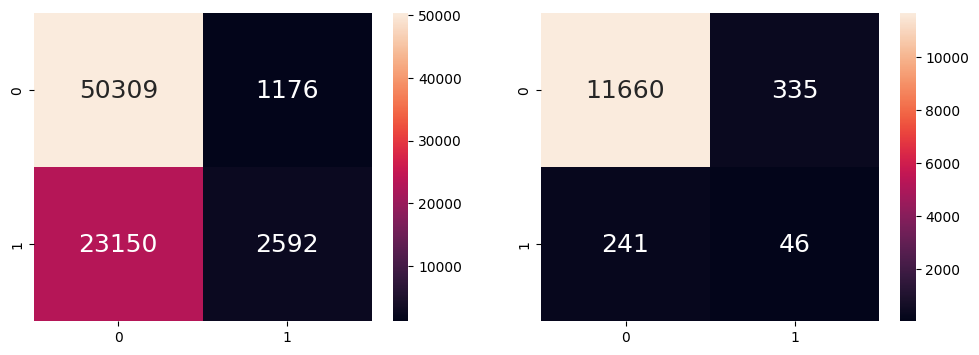

In [48]:
model1 = train_nn(X_train_oversampled, y_train_oversampled, X_val, y_val, X_test, y_test)

Epoch 1/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6232 - loss: 0.6887 - val_accuracy: 0.8272 - val_loss: 0.4930
Epoch 2/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6815 - loss: 0.5917 - val_accuracy: 0.8640 - val_loss: 0.4651
Epoch 3/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6865 - loss: 0.5828 - val_accuracy: 0.8671 - val_loss: 0.4279
Epoch 4/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6932 - loss: 0.5752 - val_accuracy: 0.9324 - val_loss: 0.4221
Epoch 5/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6987 - loss: 0.5667 - val_accuracy: 0.8798 - val_loss: 0.4528
Epoch 6/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7069 - loss: 0.5610 - val_accuracy: 0.8924 - val_loss: 0.4675
Epoch 7/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7069 - loss: 0.5555 - val_accuracy: 0.9011 - val_loss: 0.4120
Epoch 8/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7088 - loss

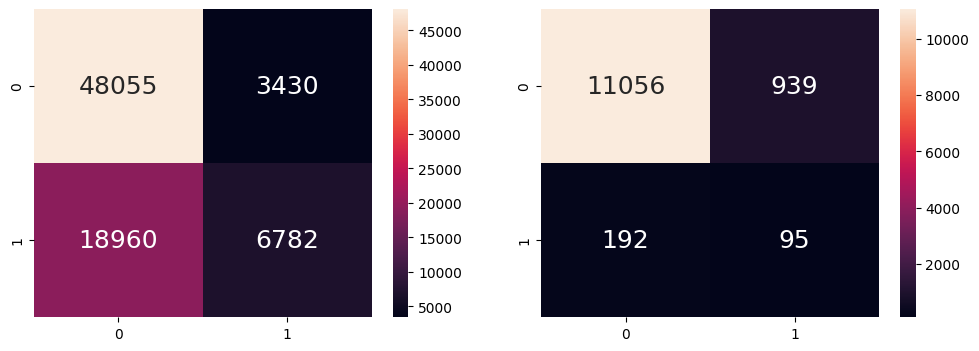

In [32]:
model = train_nn(X_train_oversampled, y_train_oversampled, X_val, y_val, X_test, y_test, model_type=3)

##### Lowering threshold

In [55]:
from sklearn.metrics import roc_curve

y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model1.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)


384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step
Optimal Threshold: 0.3353408


384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79     11995
           1       0.05      0.80      0.10       287

    accuracy                           0.66     12282
   macro avg       0.52      0.73      0.45     12282
weighted avg       0.97      0.66      0.78     12282



<Axes: >

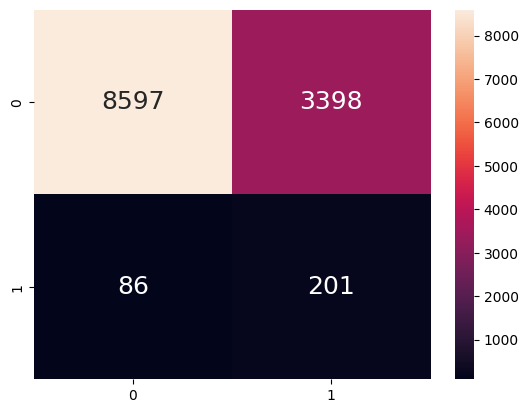

In [56]:
threshold = 0.34090817
y_pred_probs = model1.predict(X_test)  # Get probabilities
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred_adjusted))
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

#### Keras with Scaling (performance dropped)

In [18]:
from sklearn.preprocessing import StandardScaler

# Create new dataframes
X_train_scaled = pd.DataFrame(X_train_oversampled)
X_val_scaled = pd.DataFrame(X_val)
X_test_scaled = pd.DataFrame(X_test)

# Scale train set data
scaler = StandardScaler()

X_train_scaled[:] = scaler.fit_transform(X_train_oversampled[:])

# Transform validation and test sets using the same scaler
X_val_scaled[:] = scaler.transform(X_val[:])
X_test_scaled[:] = scaler.transform(X_test[:])

X_train_scaled.describe()
X_val_scaled.describe()
X_test_scaled.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X15,X16,X17,X18
count,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04,7.722700e+04
mean,2.090400e-16,3.781489e-17,4.600352e-18,4.600352e-19,2.355380e-17,-1.186891e-17,7.507774e-17,3.864296e-18,-3.238648e-17,-1.067282e-17,4.531347e-18,-3.680281e-18,7.820598e-18,9.936760e-18,-3.238648e-17,1.656127e-18,1.812539e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.564103e+00,-2.615293e-01,-7.004831e-02,-1.740081e+02,-8.044091e-01,-1.459744e+02,-1.281058e+00,-1.825597e-02,-4.763111e+00,-1.474506e-01,-1.696086e+02,-1.950336e+02,-3.171612e-02,-1.113166e+02,-4.763111e+00,-4.088833e-02,-2.172164e-01
25%,-8.139944e-01,-1.321112e-01,-4.134386e-02,3.023879e-02,-7.760174e-01,3.149825e-02,-7.537815e-01,-1.662501e-02,-2.688420e-01,-1.465497e-01,3.028975e-02,-2.250717e-02,-2.767434e-02,3.395749e-02,-2.688420e-01,-3.208389e-02,-1.143535e-01
50%,9.410930e-04,-7.047967e-02,-2.406500e-02,4.932028e-02,-3.844408e-01,4.817471e-02,-2.255541e-01,-1.484732e-02,-1.020571e-01,-7.477091e-02,5.002270e-02,1.215432e-02,-2.512629e-02,3.892100e-02,-1.020571e-01,-2.632911e-02,-6.304234e-02
75%,8.148985e-01,2.661964e-02,1.526496e-03,5.827371e-02,4.275837e-01,5.313674e-02,4.681886e-01,-1.108097e-02,1.288956e-01,4.669890e-02,5.806720e-02,5.564315e-02,-2.096800e-02,4.022055e-02,1.288956e-01,-2.030660e-02,1.294911e-02
max,2.284052e+00,1.780646e+02,2.599384e+02,5.144768e+00,6.139509e+00,2.364550e+01,6.758683e+00,2.600829e+02,1.360277e+02,1.967020e+02,4.954713e+00,3.356394e+01,1.836776e+02,1.500992e-01,1.360277e+02,1.763523e+02,1.515869e+02


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X15,X16,X17,X18
count,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000,10473.000000
mean,0.003114,0.019769,-0.006155,-0.044521,-0.075905,-0.058323,-0.082104,0.043118,-0.000577,0.201831,-0.042058,-0.022897,0.038064,-0.025093,-0.000577,0.045391,0.037467
std,1.033339,2.803499,1.017360,1.630528,0.950199,1.823288,1.009062,1.548444,1.901288,20.483131,1.596219,2.238954,1.657346,1.389297,1.901288,2.112077,1.883784
min,-1.956777,-0.205058,-0.070048,-144.716092,-0.804409,-116.131051,-1.158935,-0.018256,-0.985860,-0.169699,-139.122948,-224.843525,-0.031698,-112.078223,-0.985860,-0.040871,-0.189172
25%,-0.828045,-0.141381,-0.046503,0.030640,-0.804409,0.033631,-0.816260,-0.015822,-0.286534,-0.147451,0.032144,-0.022811,-0.027993,0.033037,-0.286534,-0.031933,-0.120361
50%,-0.007878,-0.087698,-0.030686,0.050152,-0.449766,0.049415,-0.309764,-0.013755,-0.145375,-0.078249,0.051341,0.009096,-0.025571,0.039021,-0.145375,-0.026362,-0.075828
75%,0.827048,0.005504,-0.007005,0.058391,0.314550,0.053799,0.327932,-0.009201,0.076204,0.037668,0.058817,0.050317,-0.021267,0.040527,0.076204,-0.020624,0.001057
max,1.912333,278.123860,103.782826,1.533298,6.139509,14.526496,6.758683,117.540486,156.592663,2095.202242,1.482611,6.225957,110.377739,0.050306,156.592663,149.631095,172.751977


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X15,X16,X17,X18
count,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000,12282.000000
mean,-0.059898,0.012342,-0.013273,-0.054796,-0.108576,-0.057104,-0.131409,0.044819,-0.061292,0.026898,-0.051074,-0.050278,0.017887,-0.027392,-0.061292,0.018108,0.026629
std,1.048596,1.915072,0.199774,1.588447,0.931891,1.442568,0.972584,1.929848,0.638260,1.245700,1.533511,2.173844,0.854826,1.047456,0.638260,0.840993,1.380163
min,-5.045843,-0.184490,-0.070048,-125.235484,-0.804409,-76.674264,-1.158935,-0.018254,-12.259400,-0.147451,-120.633343,-194.592020,-0.031706,-51.757197,-12.259400,-0.040866,-0.175846
25%,-0.925616,-0.143371,-0.046577,0.027777,-0.804409,0.031423,-0.835844,-0.015955,-0.300478,-0.147451,0.028492,-0.025971,-0.028131,0.032902,-0.300478,-0.031138,-0.123100
50%,-0.139259,-0.091407,-0.030277,0.049262,-0.491739,0.048699,-0.352313,-0.013852,-0.162978,-0.043839,0.050557,0.006638,-0.025836,0.038928,-0.162978,-0.025421,-0.080595
75%,0.776275,-0.004539,-0.007391,0.057557,0.245045,0.053458,0.242003,-0.009541,0.042536,0.073175,0.057947,0.045953,-0.021624,0.040432,0.042536,-0.019914,-0.008923
max,1.912333,170.395643,16.311834,0.787955,6.139509,12.329668,6.758683,183.838279,30.585596,119.837756,0.766031,13.193862,62.881299,0.067393,30.585596,60.366631,105.814478


Epoch 1/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6241 - loss: 0.6950 - val_accuracy: 0.8943 - val_loss: 0.4516
Epoch 2/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6730 - loss: 0.5993 - val_accuracy: 0.8938 - val_loss: 0.4311
Epoch 3/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6807 - loss: 0.5886 - val_accuracy: 0.8657 - val_loss: 0.4429
Epoch 4/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6915 - loss: 0.5791 - val_accuracy: 0.8904 - val_loss: 0.4580
Epoch 5/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6937 - loss: 0.5767 - val_accuracy: 0.8502 - val_loss: 0.4594
Epoch 6/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6989 - loss: 0.5694 - val_accuracy: 0.9118 - val_loss: 0.4554
Epoch 7/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7019 - loss: 0.5627 - val_accuracy: 0.8722 - val_loss: 0.4921
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 2s 938us/step
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 838us/

<Sequential name=sequential_13, built=True>

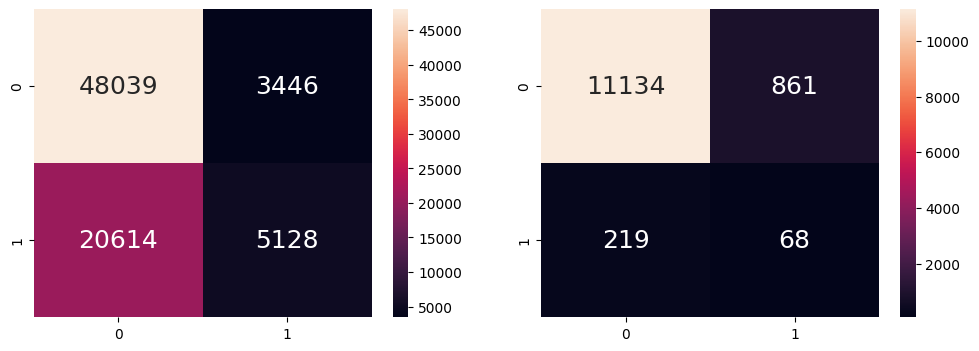

In [19]:
train_nn(X_train_scaled, y_train_oversampled, X_val, y_val, X_test, y_test)

### Undersampling + Oversampling in train set (performance not as good)

In [20]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define SMOTE with a 20% ratio
smote2 = SMOTE(sampling_strategy=0.2, random_state=99) 

# Apply SMOTE only to training data
X_train_resampled, y_train_resampled = smote2.fit_resample(X_train, y_train)
X_train_resampled.head()
y_train_resampled.head()

# Check new class distribution
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

from sklearn.utils import resample

# Reset index for proper alignment

temp_df = pd.concat([y_train_resampled.to_frame(), X_train_resampled], axis=1)

df_majority = temp_df[temp_df.status_label == "alive"]
df_minority = temp_df[temp_df.status_label == "failed"]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority, 
    replace=False, 
    n_samples=len(df_minority), 
    random_state=99
)

df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced.head()
df_balanced.info()

X_train_resampled = df_balanced.drop(columns=["status_label"])
y_train_resampled = df_balanced["status_label"]

print("After Resampling:", Counter(y_train_resampled))

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X15,X16,X17,X18
0,0.689971,1.124304,0.024795,0.120150,0.453467,0.047454,0.173210,0.503040,1.382369,0.243519,0.095355,0.258065,0.221075,0.271291,1.382369,0.541814,1.262219
1,0.692247,1.017036,0.026468,0.091710,0.456776,0.026403,0.164118,0.537317,1.245637,0.256445,0.065241,0.228600,0.178658,0.290751,1.245637,0.515267,1.153927
2,0.614836,0.741309,0.031676,0.038309,0.403532,-0.082989,0.109164,0.513367,0.899355,0.306532,0.006633,0.158046,0.211862,0.196569,0.899355,0.563172,0.861046
3,0.577337,0.723466,0.039574,0.044777,0.378599,-0.018074,0.096592,0.208746,0.883074,0.239809,0.005204,0.159608,0.296488,0.180749,0.883074,0.570377,0.838297
4,0.609346,0.737781,0.037615,0.066955,0.348580,0.004940,0.147557,0.435515,0.919167,0.350583,0.029341,0.181387,0.185059,0.185938,0.919167,0.574669,0.852212


0    alive
1    alive
2    alive
3    alive
4    alive
Name: status_label, dtype: object

Before SMOTE: Counter({'alive': 51485, 'failed': 4442})
After SMOTE: Counter({'alive': 51485, 'failed': 10297})


,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X15,X16,X17,X18
51413,alive,0.913271,5.082910,0.007645,0.086649,0.408470,0.046579,0.443741,0.593538,5.315602,0.013078,0.079004,0.232692,0.596240,0.224273,5.315602,0.628149,5.228952
2532,alive,0.286122,0.209117,0.014557,0.090508,0.193322,0.062589,0.069143,0.596992,0.373325,0.340567,0.075950,0.164208,0.168722,0.320820,0.373325,0.623623,0.282817
34640,alive,0.539174,0.341455,0.064595,-0.306378,0.000000,-0.502346,0.268730,1.300380,0.878010,0.007646,-0.370972,0.536555,0.287635,-0.495109,0.878010,0.314942,1.184388
29974,alive,0.865219,0.331180,0.029094,-0.123064,0.139183,-0.160103,0.201258,6.947619,1.056530,0.005773,-0.152158,0.725350,0.246070,-4.512146,1.056530,0.251843,1.179594
236,alive,0.218246,0.387014,0.071773,0.172565,0.058304,0.015017,0.118820,0.932457,0.661036,0.316281,0.100792,0.274022,0.166229,0.394184,0.661036,0.644907,0.488471


<class 'pandas.core.frame.DataFrame'>
Index: 20594 entries, 51413 to 61781
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  20594 non-null  object 
 1   X1            20594 non-null  float64
 2   X2            20594 non-null  float64
 3   X3            20594 non-null  float64
 4   X4            20594 non-null  float64
 5   X5            20594 non-null  float64
 6   X6            20594 non-null  float64
 7   X7            20594 non-null  float64
 8   X8            20594 non-null  float64
 9   X9            20594 non-null  float64
 10  X11           20594 non-null  float64
 11  X12           20594 non-null  float64
 12  X13           20594 non-null  float64
 13  X14           20594 non-null  float64
 14  X15           20594 non-null  float64
 15  X16           20594 non-null  float64
 16  X17           20594 non-null  float64
 17  X18           20594 non-null  float64
dtypes: float64(17), object(1)
m

Epoch 1/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5581 - loss: 0.8253 - val_accuracy: 0.7721 - val_loss: 0.8059
Epoch 2/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5901 - loss: 0.6805 - val_accuracy: 0.4954 - val_loss: 0.9737
Epoch 3/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6165 - loss: 0.6562 - val_accuracy: 0.3986 - val_loss: 0.9700
Epoch 4/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6300 - loss: 0.6465 - val_accuracy: 0.4048 - val_loss: 1.0171
Epoch 5/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6371 - loss: 0.6396 - val_accuracy: 0.4214 - val_loss: 1.1202
Epoch 6/100
644/644 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6420 - loss: 0.6347 - val_accuracy: 0.3631 - val_loss: 1.1066
644/644 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step

Train set evaluation:
Train Loss: 0.6749082803726196
Train Accuracy: 0.5713314414024353
Train Precision: 0.6457630482238539
Train F1 Score: 0

<Sequential name=sequential_14, built=True>

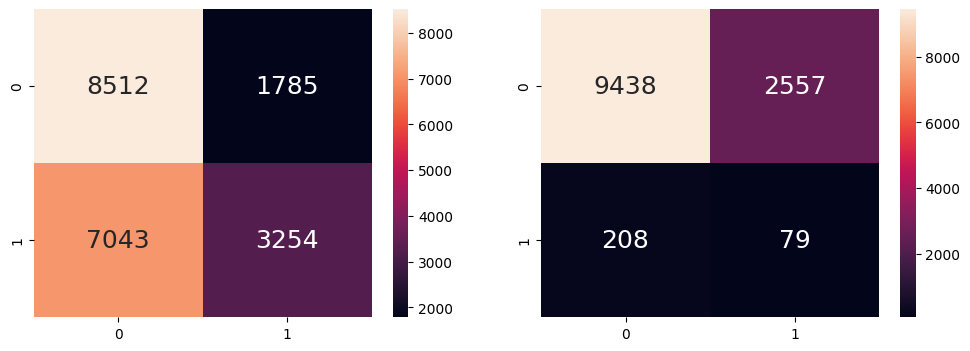

In [21]:
train_nn(X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)

## Keras with class weights (failed to identify positives)

Epoch 1/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8098 - loss: 0.5883 - val_accuracy: 0.9514 - val_loss: 0.2651
Epoch 2/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9176 - loss: 0.4499 - val_accuracy: 0.9374 - val_loss: 0.3703
Epoch 3/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9186 - loss: 0.4324 - val_accuracy: 0.9408 - val_loss: 0.4302
Epoch 4/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9191 - loss: 0.4305 - val_accuracy: 0.9140 - val_loss: 0.4841
Epoch 5/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9200 - loss: 0.4295 - val_accuracy: 0.9210 - val_loss: 0.4504
Epoch 6/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9200 - loss: 0.4288 - val_accuracy: 0.9395 - val_loss: 0.3975
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 2s 921us/step
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step

Train set evaluation:
Train Loss: 0.2845589518547058
Train Accuracy: 0.9205034971237183
Train Precision: 0.35714285714285715


<Sequential name=sequential_15, built=True>

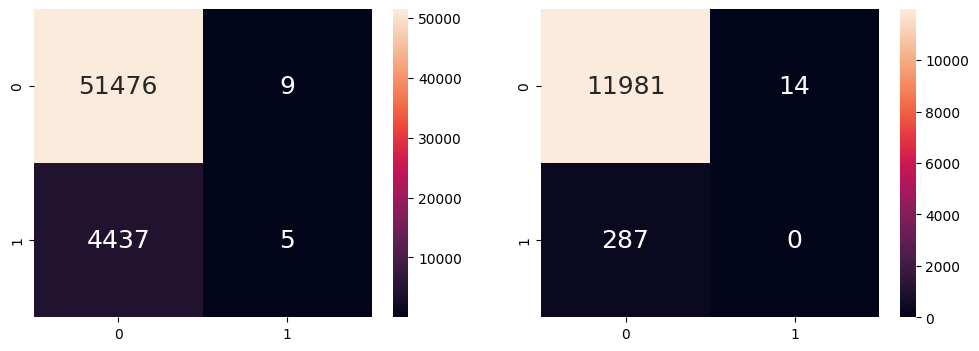

In [22]:
train_nn(X_train, y_train, X_val, y_val, X_test, y_test, class_weight_dict = {0: 1.0, 1: 2.0})

## Optimizing best model (SMOTE without scaling)

### Try a simpler model

Epoch 1/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.6273 - loss: 0.6784 - val_accuracy: 0.9437 - val_loss: 0.4117
Epoch 2/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6805 - loss: 0.5947 - val_accuracy: 0.9006 - val_loss: 0.4352
Epoch 3/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6866 - loss: 0.5890 - val_accuracy: 0.8826 - val_loss: 0.4433
Epoch 4/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6903 - loss: 0.5834 - val_accuracy: 0.9187 - val_loss: 0.4566
Epoch 5/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6898 - loss: 0.5807 - val_accuracy: 0.9489 - val_loss: 0.4330
Epoch 6/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6967 - loss: 0.5705 - val_accuracy: 0.8742 - val_loss: 0.4667
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 2s 688us/step
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step

Train set evaluation:
Train Loss: 0.592963457107544
Train Accuracy: 0.6734820604324341
Train Precision: 0.6196542311191993
Tr

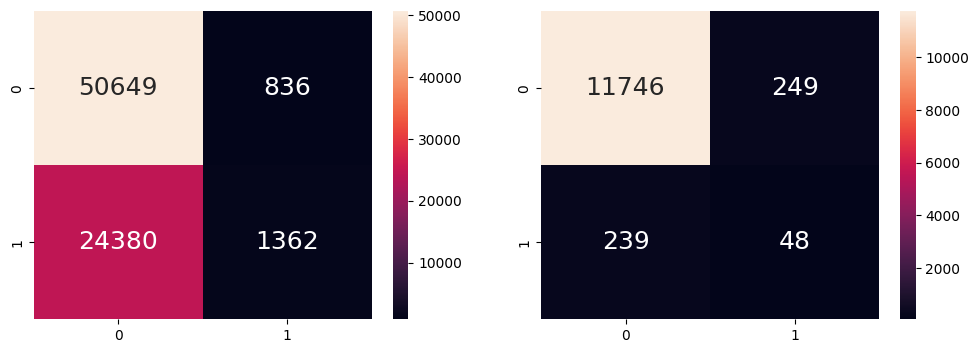

In [49]:
model2 = train_nn(X_train_oversampled, y_train_oversampled, X_val, y_val, X_test, y_test, model_type=1)

#### Lowering threshold

In [51]:
from sklearn.metrics import roc_curve

y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)


384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step
Optimal Threshold: 0.35238606


384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79     11995
           1       0.05      0.80      0.10       287

    accuracy                           0.66     12282
   macro avg       0.52      0.73      0.45     12282
weighted avg       0.97      0.66      0.78     12282



<Axes: >

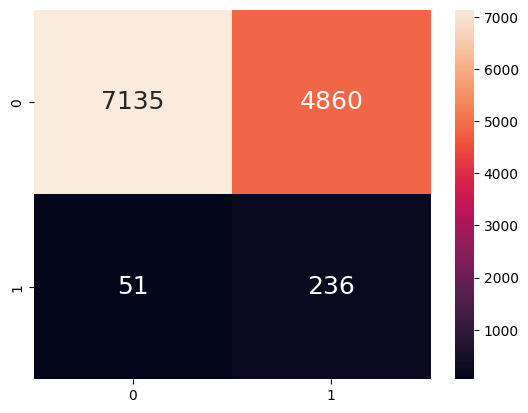

In [52]:
threshold = optimal_threshold
y_pred_probs = model2.predict(X_test)  # Get probabilities
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred_adjusted))
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

### Try a deeper model

Epoch 1/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6284 - loss: 0.6726 - val_accuracy: 0.8986 - val_loss: 0.4177
Epoch 2/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6755 - loss: 0.5953 - val_accuracy: 0.9041 - val_loss: 0.3997
Epoch 3/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6854 - loss: 0.5855 - val_accuracy: 0.9015 - val_loss: 0.4763
Epoch 4/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6924 - loss: 0.5755 - val_accuracy: 0.8869 - val_loss: 0.4552
Epoch 5/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6999 - loss: 0.5682 - val_accuracy: 0.8405 - val_loss: 0.4716
Epoch 6/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7036 - loss: 0.5628 - val_accuracy: 0.8986 - val_loss: 0.4002
Epoch 7/100
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7059 - loss: 0.5579 - val_accuracy: 0.8734 - val_loss: 0.4794
2414/2414 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/st

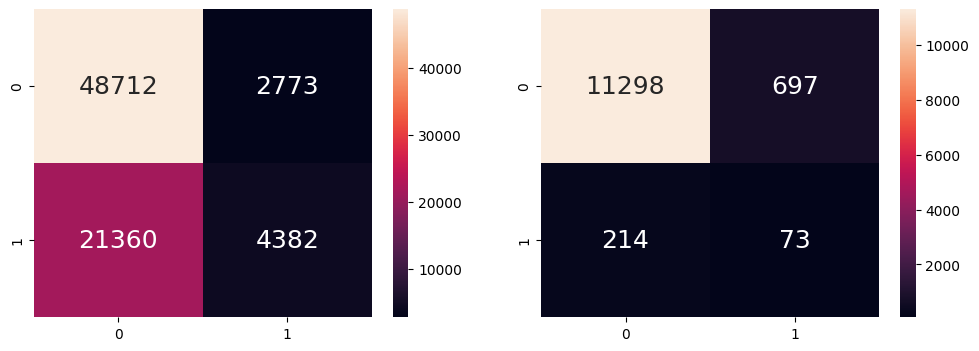

In [50]:
model3 = train_nn(X_train_oversampled, y_train_oversampled, X_val, y_val, X_test, y_test, model_type=3)

#### Lowering threshold

In [53]:
from sklearn.metrics import roc_curve

y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model3.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs)
optimal_idx = (tpr - fpr).argmax()
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)


384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step
Optimal Threshold: 0.35505116


384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.99      0.66      0.79     11995
           1       0.05      0.80      0.10       287

    accuracy                           0.66     12282
   macro avg       0.52      0.73      0.45     12282
weighted avg       0.97      0.66      0.78     12282



<Axes: >

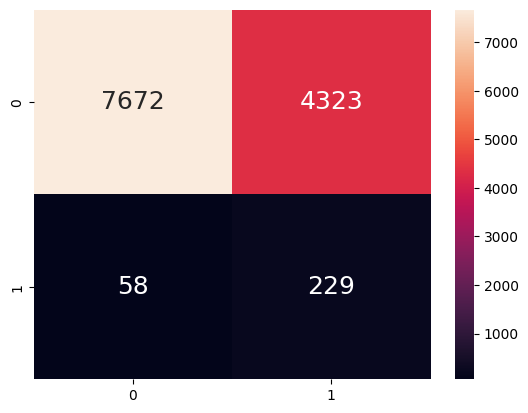

In [54]:
threshold = optimal_threshold
y_pred_probs = model3.predict(X_test)  # Get probabilities
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred_adjusted))
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

# Altman's Z-Score Model

In [9]:
df2 = pd.read_csv("american_bankruptcy.csv")
df2['ZX1'] = (df2["X1"] - df2["X14"]) / df2["X10"]
df2['ZX2'] = df2['X15']/df2['X10']
df2['ZX3'] = df2["X12"]/df2['X10']
df2['ZX4'] = df2['X8']/df2['X17']
df2['ZX5'] = df2['X9']/df2['X10']

df2["Z"] = 1.2*df2["ZX1"] + 1.4*df2["ZX2"] + 3.3*df2["ZX3"] + 0.6*df2["ZX4"] + 1*df2["ZX5"]


# Define conditions
conditions = [
    df2["Z"] < 1.8,  # High risk
    df2["Z"] > 3.0   # Low risk
]

# Define corresponding labels
labels = ['High', 'Low']

# Create the column using np.select, with default as 'Grey'
df2["Z_pred"] = np.select(conditions, labels, default='Grey')
            
# grey_rows = df2["Z_pred"].value_counts().get("Grey",0)
# print(f"Number of grey rows: {grey_rows}")
df2 = df2[["year","status_label","ZX1","ZX2","ZX3","ZX4","ZX5","Z","Z_pred"]]
df2.head()
df2["Z_pred"].value_counts()

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
0,1999,alive,0.468896,0.271291,0.095355,0.928438,1.382369,3.196587,Low
1,2000,alive,0.513588,0.290751,0.065241,1.042794,1.245637,3.109968,Low
2,2001,alive,0.402974,0.196569,0.006633,0.911564,0.899355,2.226949,Grey
3,2002,alive,0.280849,0.180749,0.005204,0.365979,0.883074,1.709901,High
4,2003,alive,0.424286,0.185938,0.029341,0.757853,0.919167,2.240159,Grey


Z_pred
Low     36479
High    28667
Grey    13536
Name: count, dtype: int64

## Whole dataset

Z_pred
0    50015
1    28667
Name: count, dtype: int64

Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.95      0.65      0.77     73462
           1       0.10      0.55      0.17      5220

    accuracy                           0.64     78682
   macro avg       0.53      0.60      0.47     78682
weighted avg       0.90      0.64      0.73     78682



<Axes: >

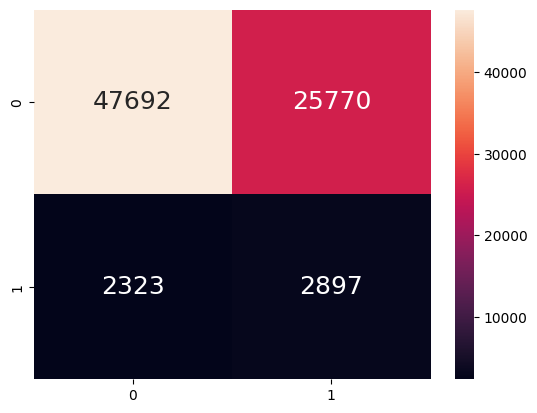

In [8]:
# assume grey and low risk is alive, high risk is failed
df2['Z_pred'] = df2['Z_pred'].apply(lambda x: 1 if x == 'High' else 0)
df2['Z_pred'].value_counts()
true_y = df2["status_label"].map({"alive": 0, "failed": 1})
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

## Testset only

Z_pred
0    7272
1    5010
Name: count, dtype: int64

Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.99      0.60      0.75     11995
           1       0.05      0.83      0.09       287

    accuracy                           0.61     12282
   macro avg       0.52      0.72      0.42     12282
weighted avg       0.97      0.61      0.73     12282



<Axes: >

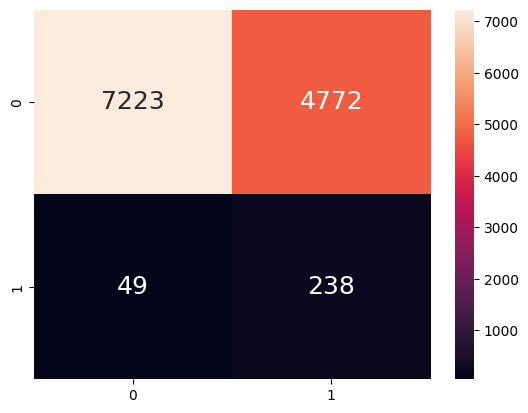

In [11]:
df2_test = df2[(df2["year"] >= 2015)]

# assume grey and low risk is alive, high risk is failed
df2_test['Z_pred'] = df2_test['Z_pred'].apply(lambda x: 1 if x == 'High' else 0)
df2_test['Z_pred'].value_counts()
true_y = df2_test["status_label"].map({"alive": 0, "failed": 1})
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2_test['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2_test['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})